In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [152]:
filename = "C:/Users/naoki/code/solar_projectN/data/nsrdb_Fresno_1998-2022.csv"

In [153]:
df_solar = pd.read_csv(filename)



In [154]:
df_solar.head()

,Year,Month,Day,Hour,Minute,Temperature,DHI,GHI,DNI,Relative Humidity,Pressure,Wind Speed,Wind Direction,Solar Zenith Angle,Fill Flag,source_file,datetime
0,1998,1,1,0,0,18.3,46,89,302,48.07,997,0.7,231,81.77,0,178586_36.73_-119.78_1998.csv,1998-01-01
1,1998,1,1,0,30,17.5,21,35,237,50.54,997,0.7,241,86.61,0,178586_36.73_-119.78_1998.csv,1998-01-01
2,1998,1,1,1,0,16.8,0,0,0,47.84,997,0.8,251,92.04,0,178586_36.73_-119.78_1998.csv,1998-01-01
3,1998,1,1,1,30,16.4,0,0,0,49.07,997,0.9,257,97.47,0,178586_36.73_-119.78_1998.csv,1998-01-01
4,1998,1,1,2,0,16.0,0,0,0,48.80,998,0.9,264,103.07,0,178586_36.73_-119.78_1998.csv,1998-01-01


In [155]:
(pd.DateOffset(years=4))

<DateOffset: years=4>

In [156]:
cutoff_date = '2019-01-01'

# Split the dataframe
df_train = df_solar[df_solar['datetime'] <= cutoff_date]
df_test = df_solar[df_solar['datetime'] > cutoff_date]

In [157]:
df_test.head()

,Year,Month,Day,Hour,Minute,Temperature,DHI,GHI,DNI,Relative Humidity,Pressure,Wind Speed,Wind Direction,Solar Zenith Angle,Fill Flag,source_file,datetime
367968,2019,1,2,0,0,5.7,48,88,274,51.53,1003,1.3,337,81.64,100,178586_36.73_-119.78_2019.csv,2019-01-02
367969,2019,1,2,0,30,4.9,25,31,94,54.46,1003,1.3,339,86.49,96,178586_36.73_-119.78_2019.csv,2019-01-02
367970,2019,1,2,1,0,4.0,1,1,2,54.97,1003,1.3,341,91.92,25,178586_36.73_-119.78_2019.csv,2019-01-02
367971,2019,1,2,1,30,4.1,0,0,0,54.64,1004,1.2,341,97.35,0,178586_36.73_-119.78_2019.csv,2019-01-02
367972,2019,1,2,2,0,4.1,0,0,0,55.10,1004,1.1,341,102.95,0,178586_36.73_-119.78_2019.csv,2019-01-02


In [158]:
X = df_train[['DHI', 'Relative Humidity', 'Wind Speed', 'Pressure','GHI','DNI',]]
y = df_train['Temperature'].values



In [159]:
X_test = df_train[['DHI', 'Relative Humidity', 'Wind Speed', 'Pressure','GHI','DNI',]]
y_test = df_train['Temperature'].values

In [160]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [161]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

In [162]:
x_test_plt = df_train.index.values
residuals[:200]

array([ 1.39867367,  1.53402845,  0.3010757 ,  0.19802095,  0.34003914,
        0.21421478, -0.00870579, -0.09136695, -0.21245491, -0.27380228,
       -0.33698225, -0.38175221, -0.34875619, -0.36694036, -0.34868914,
       -0.34700749, -0.38413726, -1.00064085, -1.13341102, -1.12921021,
       -1.21973741, -1.82913639, -1.78230798, -1.76443356, -1.61867632,
       -1.58002368, -1.98300462, -1.91974976, -1.65795071, -1.70187534,
       -1.22204308, -0.95898632,  1.10044921,  0.36216167,  1.17902965,
        1.14723352, -0.16089633, -0.99083163, -1.22031589, -1.32127823,
       -1.23940897, -0.78920268, -1.29545881, -1.19021994,  0.45179376,
       -0.83346713,  1.46771193,  2.05608371,  0.34821721,  0.61559164,
       -0.55710964, -0.51203895, -0.6383989 , -0.56200602, -0.52442456,
       -0.45735353, -0.31266747, -0.25690184, -0.15140401, -0.08050896,
        0.09129848,  0.20336532,  0.30122296,  0.47906383,  0.47982526,
        0.63543992,  0.56041895,  0.6763098 ,  0.59418422,  0.59

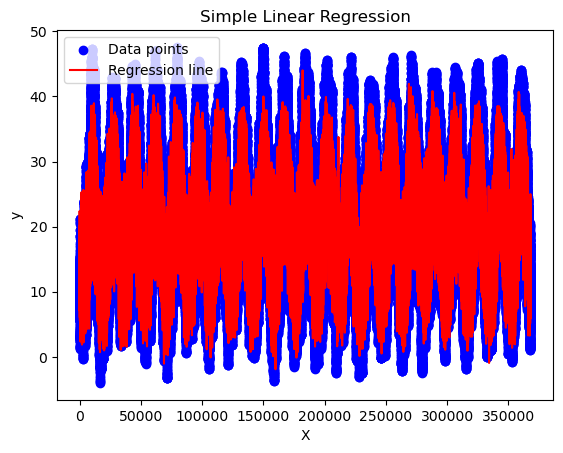

In [163]:
plt.scatter(x_test_plt, y_test, color='blue', label='Data points')
plt.plot(x_test_plt, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [164]:
print(f"Slope: {model.coef_[1]:.10f}")
print(f"Intercept: {model.intercept_:.5f}")

Slope: -0.2368200252
Intercept: 632.01537


Text(0.5, 1.0, 'Residual Plot')

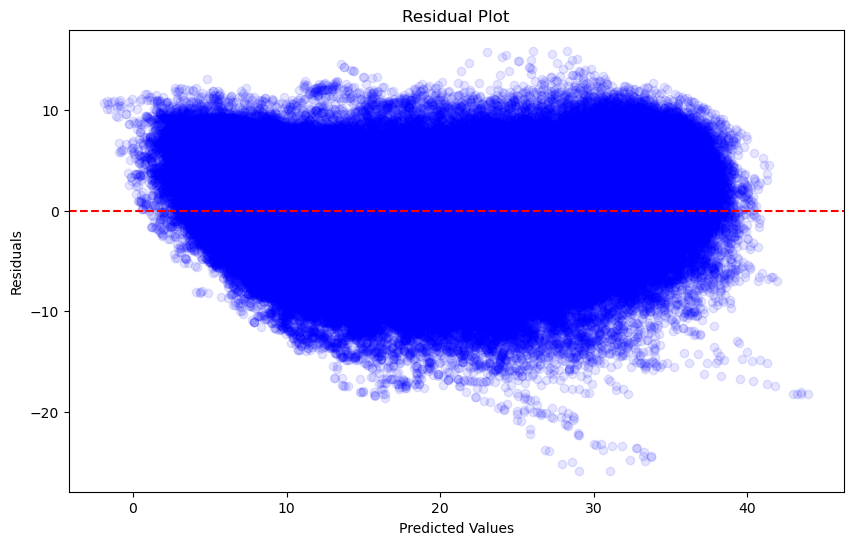

In [165]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.1)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')

plt.ylabel('Residuals')
plt.title('Residual Plot')

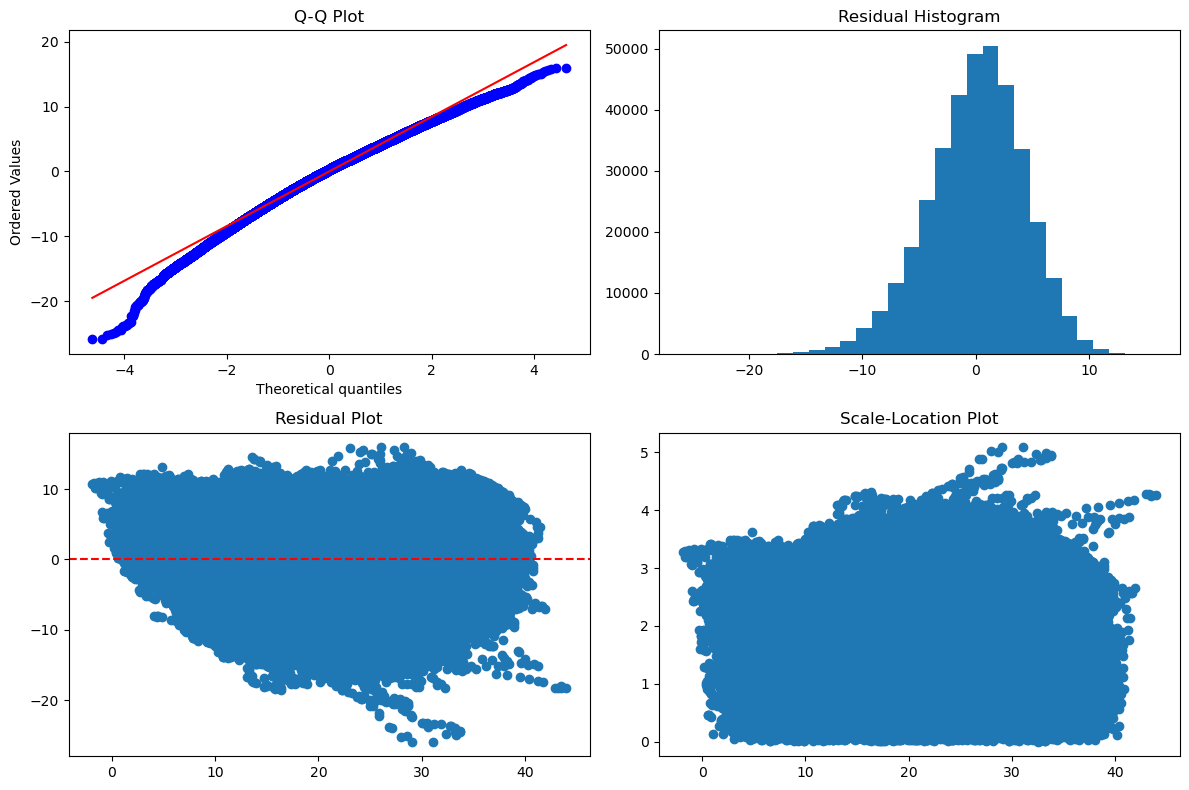

R² Score: 0.8021
Shapiro-Wilk test for normality (p-value): 0.0000


c:\Users\naoki\miniforge3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 367968.
  res = hypotest_fun_out(*samples, **kwds)


ValueError: The Breusch-Pagan test requires exog to have at least two columns where one is a constant.

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score
import statsmodels.api as sm



# 1. Check normality of residuals
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[0,0])
axes[0,0].set_title("Q-Q Plot")

# Residual histogram
axes[0,1].hist(residuals, bins=30)
axes[0,1].set_title("Residual Histogram")

# Residual plot
axes[1,0].scatter(y_pred, residuals)
axes[1,0].axhline(y=0, color='r', linestyle='--')
axes[1,0].set_title("Residual Plot")

# Scale-Location plot
axes[1,1].scatter(y_pred, np.sqrt(np.abs(residuals)))
axes[1,1].set_title("Scale-Location Plot")

plt.tight_layout()
plt.show()

# Print statistical tests and metrics
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Shapiro-Wilk test for normality (p-value): {stats.shapiro(residuals)[1]:.4f}")
print(f"Breusch-Pagan test for homoscedasticity (p-value): {sm.stats.diagnostic.het_breuschpagan(residuals, X)[1]:.4f}")